### GTSRB

In [1]:
import torch
import numpy as np

from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

training_data = datasets.GTSRB(
    root="data",
    split="train",
    transform=ToTensor(),
    download=True,
)

test_data = datasets.GTSRB(
    root="data",
    split="test",
    transform=ToTensor(),
    download=True,
)

100%|██████████| 187490228/187490228 [38:21<00:00, 81480.07it/s]  


Extracting data/gtsrb/GTSRB-Training_fixed.zip to data/gtsrb


100%|██████████| 88978620/88978620 [06:57<00:00, 213040.11it/s]


Extracting data/gtsrb/GTSRB_Final_Test_Images.zip to data/gtsrb


100%|██████████| 99620/99620 [00:00<00:00, 200074.78it/s]


Extracting data/gtsrb/GTSRB_Final_Test_GT.zip to data/gtsrb


2


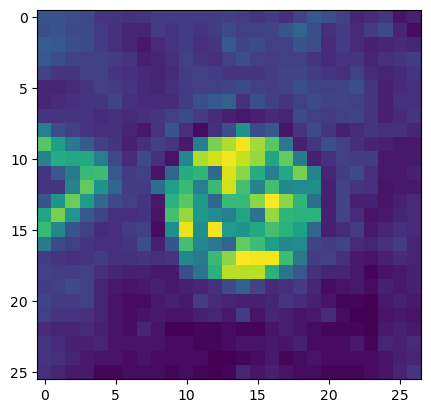

In [10]:
img, label = training_data[3000]
plt.imshow(img[1, :, :].squeeze())
print(label)

In [11]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)


In [12]:
from torch import nn
from torchvision import transforms

# choose device
device = ("cuda" if torch.cuda.is_available()
          else "mps" if torch.backends.mps.is_available()
          else "cpu")
print(f"using {device} device")

# subclass


class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits


# instance of class
model = NeuralNetwork().to(device)
print(model)

# use model
X = torch.rand(1, 28, 28, device=device)
logits = model(X)
# output is 1x10 raw predicted val for each class, passed through softmax for largest prediction
pred_probab = nn.Softmax(dim=1)(logits)
# y_pred = torch.argmax(pred_probab) # argmax doesn't work on mps
y_pred = pred_probab.max(dim=1).indices
print(f"Predicted class: {y_pred}")


using mps device
NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)
Predicted class: tensor([7], device='mps:0')
